In [1]:
# loading the usual libraries for matrix calculation(numpy), algorithms(sklearn),
# display matplotlib, dataframe(pandas), nltk (text analytics)
import numpy as np
import sklearn
import matplotlib as plt
%matplotlib inline
import pandas as pd
#import sys
import nltk

## The goal of this notebook is to predict a company classification based on its slogan.
## classification is a number between 15 and 60. Slogans are in text form
### Part 1 of the notebook is to convert text to numbers (vectors)
### Part 2 is to try different models to predict
### part 3 is to save a model to use in an app

In [2]:
# Begin part 1 convert text to numbers

In [3]:
df = pd.read_excel('./data/aug21afternoonslogan.xlsx')
# this file is the original 675 slogans file repeated four times.
# I assume it was a good way to bootstrap it 

In [4]:
df.head()

,COMPANY,SLOGAN,SectorId,URL,Telecommunication Services,GICS_SubIndustry,WORDS,Unnamed: 7
0,3M Company,Science. Applied to life.,20,3M Company,Industrials,Industrial Conglomerates,4.0,NaN
1,A&P,"At the A&P, we watch our P's and Q's.",30,A&P,Consumer Staples,NaN,NaN,
2,Abbott Laboratories,Life. To the fullest.,35,Abbott Laboratories,Health Care,Health Care Equipment,4.0,NaN
3,AbbVie,People. Passion. Possibilities.,35,AbbVie Inc.,Health Care,Pharmaceuticals,3.0,NaN
4,ABN AMRO Bank,Making More Possible,40,NaN,Financials,NaN,NaN,NaN


In [5]:
X = np.array(df['SLOGAN'])
y = np.array(df['SectorId'])
# loading the y and the X. y = f(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# split the data in test and train dataset. 
# the model is trained on train data and tested on test data

In [7]:
from nltk.corpus import stopwords
from nltk.stem import porter
import string
stemmer = porter.PorterStemmer()

stopwords = stopwords.words()
# importing functions to clean data

In [8]:
def clean_text(text):
    cleaned_text = []
    for post in text:
        cleaned_words = []
        post = post.replace("’",'')            # remove the "’" signs coming from import
        for punc in string.punctuation:
            post = post.replace(punc,'')       # remove the !@#$%^& .. signs
        for word in post.split():
            low_word = stemmer.stem(word.lower())   # lowercase and stem the words
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))   # put it all together
    return cleaned_text

clean_text(['BOB the builder', 'is a strange', 'caRtoon type thing'])
# this is copied / pasted each time slogans needs cleaning.
# see result below

['bob builder', 'strang', 'cartoon type thing']

In [9]:
cleaned_text = clean_text(X_train)

In [10]:
X_train

array(['We make things work for you', 'More Driven',
       'The safer way to pay online', ..., ' The New Sign of Success.',
       'HOME ENTERTAINMENT', 'Keep Challenging'], dtype=object)

In [11]:
cleaned_text

['make thing work',
 'driven',
 'safer way pay onlin',
 'good good enough',
 'strength side',
 'amaz soup',
 'easi caveman',
 'health need close home',
 'reach touch someon',
 'invent',
 'time like metlif set apart',
 'bring energi life',
 'exceed vision',
 'earthmov solut today challeng',
 'keep promis',
 'would klondik bar',
 'driven',
 'let build smarter planet',
 'bond best',
 'global asset manag',
 'listen think solv',
 'power player',
 'plop plop fizz fizz oh relief',
 'low fare noth hide transfar',
 'drive way',
 'inspir progress',
 'think green',
 'thing go better coke',
 'cabl choic choic',
 'empow financi institut global',
 'onli canth media agenc',
 'world built',
 'buy sell love',
 'rais perform togeth',
 'amaz soup',
 'good good',
 'easi',
 'trade world',
 'ask work',
 'power tyson',
 'love live',
 'choos freedom',
 'chang valu equat',
 'strateg partner global trade',
 'fluent financ busi know busi',
 'integr creativ stabil',
 'way car buy',
 'put first keep ahead',
 'pure

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df = 0.6, max_features=2000, 
                                   token_pattern="\\b[a-z][a-z]+\\b")

cv_data = count_vectorizer.fit_transform(cleaned_text)


In [13]:
dfx_count_vect = pd.DataFrame(cv_data.toarray(), columns=count_vectorizer.get_feature_names())
dfx_count_vect.shape
# vectorizing the data 

(2430, 1938)

In [14]:
dfx_count_vect.head(1)
# showing results

,abc,absolut,absolut posit,acceler,acceler next,acceler yield,achiev,achiev anyth,acquisit,act,...,youd,youd surpris,youll,youll ever,youll find,youll never,youv,youv long,yum,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
columns=count_vectorizer.get_feature_names() 
# this provides a list of all the words used to vectorized a slogan
# when I will enter a slogan in an app, it will go through vectorizing using this

In [16]:
len(columns) #there are 1938 words

1938

In [17]:
columns[1]  # 2nd column seen above

'absolut'

In [18]:
# end part 1 convert text to numbers
# start part 2 try different model to predict

In [19]:
# training the model with MultinomialNB
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(cv_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
# running the model on test data
cleaned_test = clean_text(X_test)
cv_test = count_vectorizer.transform(cleaned_test)

nb.score(cv_test, y_test)
# 0.35384615384615387 aug 10 data
# 0.2994011976047904 aug 14 data
# 0.9518518518518518 aug 21 data

0.9518518518518518

In [21]:
#  getting libraries to visualize confusion and classification results
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError

In [22]:
visualizer = ConfusionMatrix(MultinomialNB(), classes=[10,15,20,25,30,35,40,45,50,55,60])

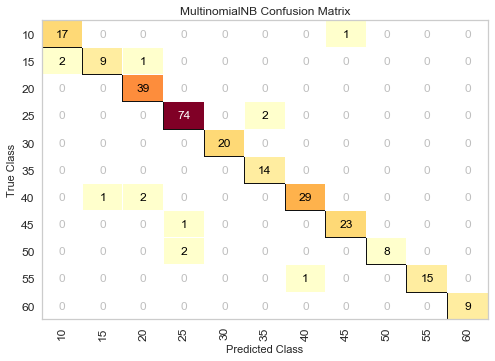

In [23]:
visualizer.fit(cv_data, y_train)  # Fit the training data to the visualizer
visualizer.score(cv_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [24]:
# training the model with GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(cv_data.toarray(), y_train)
cleaned_test = clean_text(X_test)
cv_test = count_vectorizer.transform(cleaned_test)
gnb.score(cv_test.toarray(), y_test)
# 0.1497005988023952 aug 14 data 
# 0.9666666666666667 aug 21 data

0.9666666666666667

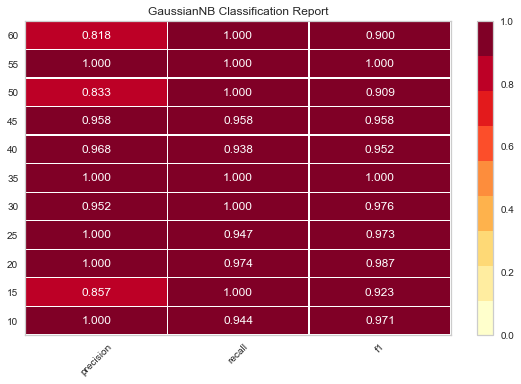

In [25]:
visualizer = ClassificationReport(GaussianNB(), classes=[10,15,20,25,30,35,40,45,50,55,60])
visualizer.fit(cv_data.toarray(), y_train)  # Fit the training data to the visualizer
visualizer.score(cv_test.toarray(), y_test)  # Evaluate the model on the test data
visualizer.poof()

In [26]:
# training the model with SGD
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(cv_data.toarray(), y_train)
cleaned_test = clean_text(X_test)
cv_test = count_vectorizer.transform(cleaned_test)
sgd.score(cv_test.toarray(), y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9777777777777777

In [27]:
visualizer = ConfusionMatrix(SGDClassifier(), classes=[10,15,20,25,30,35,40,45,50,55,60])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


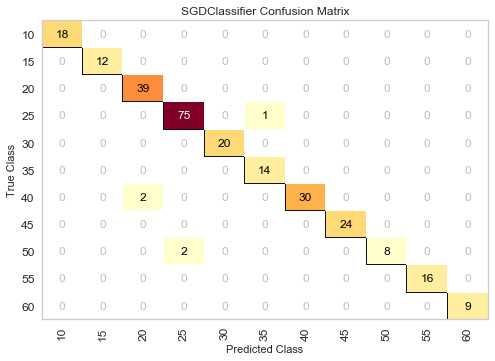

In [28]:
visualizer.fit(cv_data, y_train)  # Fit the training data to the visualizer
visualizer.score(cv_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


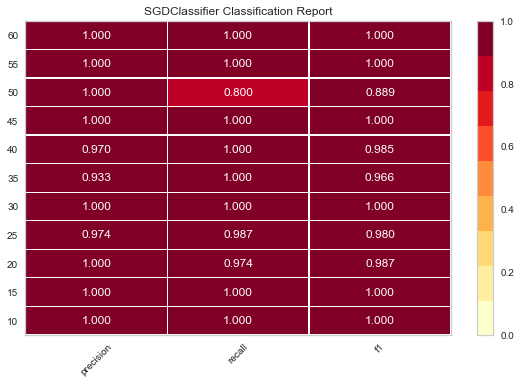

In [29]:
visualizer = ClassificationReport(SGDClassifier(), classes=[10,15,20,25,30,35,40,45,50,55,60])
visualizer.fit(cv_data, y_train)  # Fit the training data to the visualizer
visualizer.score(cv_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [30]:
# training the model with Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(cv_data.toarray(), y_train)
cleaned_test = clean_text(X_test)
cv_test = count_vectorizer.transform(cleaned_test)
lr.score(cv_test.toarray(), y_test)

0.9629629629629629

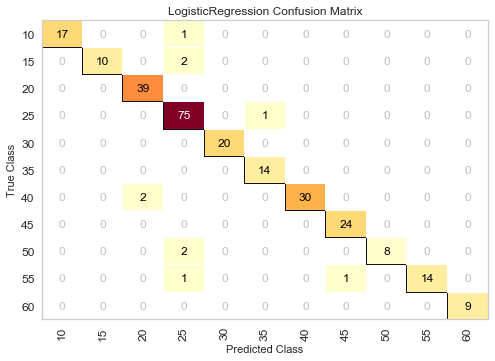

In [31]:
visualizer = ConfusionMatrix(LogisticRegression(), classes=[10,15,20,25,30,35,40,45,50,55,60])
visualizer.fit(cv_data, y_train)  # Fit the training data to the visualizer
visualizer.score(cv_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

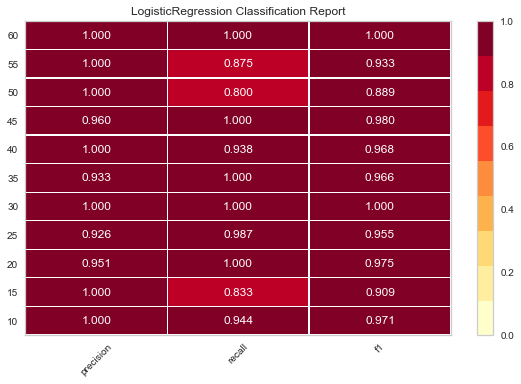

In [32]:
visualizer = ClassificationReport(LogisticRegression(), classes=[10,15,20,25,30,35,40,45,50,55,60])
visualizer.fit(cv_data, y_train)  # Fit the training data to the visualizer
visualizer.score(cv_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [33]:
# end part 2 try different model to predict
# start part 3 save the model

In [34]:
#we are going to save the logistics regression model in pickle files for an app usage
# app is in "02 Predictor" directory
import pickle
pickle.dump(lr,open("./data/slogpred.p","wb")) # saving the model to use in the app 
pickle.dump(columns,open("./data/colonnes.p","wb")) # saving the words to vectorize slogans on